<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">Optimisation and Financial Mathematics</h1>
<h2 align="center" style="margin-top:10px">Computer Project </h2>
<h3 align="center" style="margin-top:10px">SID: 510678236 </h3>
<br>

In [1653]:
# Import packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
import statistics as st

projdat = pd.read_csv("OFM_project_data.csv")

### Questions

### Question 1


###### Part A

For each of the five stocks, compute the simple return rates, that is, Rt = St−St−1
St−1 , where
St is the price of the stock at time t. Estimate the mean vector and covariance matrix of
the returns, round to 4 decimal places, and verify that they are of the following:

In [1654]:
stock_names = ["BHP", "CSL", "NAB", "REA", "WOW"] # gathering an array of stock names

bhp_ret = (projdat["BHP"]/projdat["BHP"].shift(1) - 1)  # Computing the BHP simple return for each day
bhp_ret = bhp_ret[1:]  # Excluding the NA value

csl_ret = (projdat["CSL"]/projdat["CSL"].shift(1) - 1)  
csl_ret = csl_ret[1:] 

nab_ret = (projdat["NAB"]/projdat["NAB"].shift(1) - 1)  
nab_ret = nab_ret[1:] 

rea_ret = (projdat["REA"]/projdat["REA"].shift(1) - 1)  
rea_ret = rea_ret[1:]

wow_ret = (projdat["WOW"]/projdat["WOW"].shift(1) - 1)  
wow_ret = wow_ret[1:] 

bhp_ret_mean = round(np.mean(bhp_ret), 4) # Calculating the mean simple return 
csl_ret_mean = round(np.mean(csl_ret), 4)
nab_ret_mean = round(np.mean(nab_ret), 4)
rea_ret_mean = round(np.mean(rea_ret), 4)
wow_ret_mean = round(np.mean(wow_ret), 4)

ret_array = np.array([bhp_ret_mean, csl_ret_mean, nab_ret_mean, rea_ret_mean, wow_ret_mean]) # gathering into an array

for index, mean_return in enumerate(ret_array):
    print('{} mean return:'.format(stock_names[index]), mean_return)

BHP mean return: 0.0008
CSL mean return: 0.0001
NAB mean return: 0.0005
REA mean return: -0.0009
WOW mean return: -0.0003


Therefore, since this result agrees with the result specified in the question the mean vector of the returns is verified.

In [1655]:
dat = np.array([bhp_ret, csl_ret, nab_ret, rea_ret, wow_ret]) # Creating an array from the simple return arrays
cov_mat = np.round(np.cov(dat), 4) # calculating the covariance matrix

print("The Covariance Matrix, S:")
print(cov_mat)

The Covariance Matrix, S:
[[ 0.0004 -0.      0.      0.      0.    ]
 [-0.      0.0002  0.      0.0002  0.0001]
 [ 0.      0.      0.0002  0.0001  0.0001]
 [ 0.      0.0002  0.0001  0.0006  0.0001]
 [ 0.      0.0001  0.0001  0.0001  0.0002]]


Therefore, since this result agrees with the result specified in the question the covariance matrix is verified.

###### Part B

Determine which risk-averse investors (in terms of the values of t) short sell in this market
and which funds they short sell. Are there any funds that no-one will short sell or that
everyone will short sell?

BHP Critical Line: 0.1884 + t(0.6087)
CSL Critical Line: 0.5217 + t(5.6087)
NAB Critical Line: 0.4638 + t(5.6522)
REA Critical Line: -0.1159 + t(-3.913)
WOW Critical Line: -0.058 + t(-7.9565)


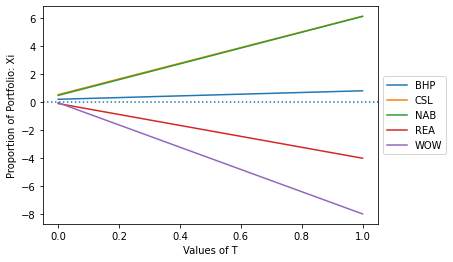

In [1656]:
e = np.array([1,1,1,1,1])

S_inv = np.linalg.inv(cov_mat) # calculating matrix inverse 

a = np.matmul(np.matmul(e.T,S_inv), e)
b =  np.matmul(np.matmul(ret_array.T,S_inv), e)

alpha = ((1/a) * np.matmul(S_inv, e)).T
beta = np.subtract(np.matmul(S_inv, ret_array), (b/a) * np.matmul(S_inv, e).T)

t_vals = np.arange(0, 2)

def critical_line(alpha, t, beta):
    return (alpha + t * beta)

for index, alpha in enumerate(alpha): 
    print(stock_names[index] + " Critical Line: " + str(round(alpha, 4)) + " + t(" + str(round(beta[index], 4)) + ")")
    plt.plot(t_vals, critical_line(alpha, t_vals, beta[index]), label = "{}".format(stock_names[index]))
            
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(linestyle = ":")
plt.xlabel("Values of T")
plt.ylabel("Proportion of Portfolio: Xi")
plt.show()

It is known (from lectures) that the risk aversion parameter, t, is greater than or equal to zero for risk averse investors. Therefore, from both the critical line equations and the graph of those lines, that a risk averse investor will always choose to short stocks REA and WOW and always have a long position on BHP, CSL and NAB. This is indictated by the fact that the critical line for REA and WOW is always negative for t >= 0 while BHP, CSL and NAB are always positive for t >= 0. (Note: CSL and NAB have similar gradients and hence CSL is covered in the graph by NAB)

### Question 2

###### Part A

Obtain Anthony’s optimal proportion and dollar investment in each of the five funds. Give
also the expected return (µ) and risk (σ) of P*

Proportion in BHP: 0.31014492753623185, Amount in BHP: 62028.98550724637
Proportion in CSL: 1.6434782608695655, Amount in CSL: 328695.6521739131
Proportion in NAB: 1.5942028985507248, Amount in NAB: 318840.57971014496
Proportion in REA: -0.8985507246376814, Amount in REA: -179710.14492753628
Proportion in WOW: -1.6492753623188408, Amount in WOW: -329855.0724637681
Mu of Optimal Portfolio: 0.0025130434782608692
Sigma of Optimal Portfolio: 0.021602468994692866


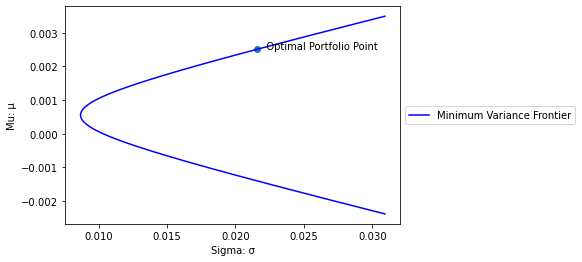

In [1657]:
t = 0.2
amount = 200000

alpha = ((1/a) * np.matmul(S_inv, e))
beta = np.subtract(np.matmul(S_inv, ret_array), (b/a) * np.matmul(S_inv, e).T)

c = np.matmul(np.matmul(ret_array.T,S_inv), ret_array)
d = a*c - b**2

mu = b/a + (d*t)/a
sig = np.sqrt(1/a + (d*t**2)/a)

x = (alpha.T + t * beta)

i = 0
for i in range(5):
    print("Proportion in {}: ".format(stock_names[i]) + str(x[i]) +
          ", Amount in {}: ".format(stock_names[i]) + str(amount * x[i]))

print("Mu of Optimal Portfolio: " + str(mu))
print("Sigma of Optimal Portfolio: " + str(sig))


### Producing the Minimum Variance Frontier prematurely for usage in all future plots:

t_plot = np.linspace(-0.3, 0.3, 300) # sigma less than or equal to 0.03 constraint
var_x = np.sqrt(1/a + (d*t_plot**2)/a)
mu_y = b/a + (d*t_plot)/a

###

plt.plot(sig, mu, "o")
plt.text(sig, mu,'   Optimal Portfolio Point')
plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.show()


###### Part B

Suppose Anthony doesn’t want to short sell any asset. Obtain the optimal restricted
portfolio P for Anthony.

Proportion in BHP: 0.4, Amount in BHP: 80000.0
Proportion in CSL: 0.09999999999999998, Amount in CSL: 19999.999999999996
Proportion in NAB: 0.5, Amount in NAB: 100000.0
Mu of Optimal Restricted Portfolio: 0.00058
Sigma of Optimal Restricted Portfolio: 0.01077032961426901


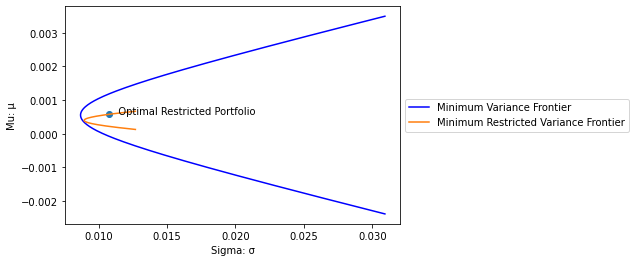

In [1658]:
# No short selling condition:
# Eliminate short selling assets, namely REA and WOW, from portfolio

# Recalculating the return array and covariance matrix

dat1 = np.array([bhp_ret, csl_ret, nab_ret])
cov_mat1 = np.round(np.cov(dat1), 4)
S_inv_res = np.linalg.inv(np.round(cov_mat1, 4))
ret_array_res = np.round(np.array([bhp_ret_mean, csl_ret_mean, nab_ret_mean]), 4)

e_res = np.array([1,1,1])


# Redefining a, b, c, d for the new no short selling case

a_res = np.matmul(np.matmul(e_res.T,S_inv_res), e_res)
b_res =  np.matmul(np.matmul(ret_array_res.T,S_inv_res), e_res)
c_res = np.matmul(np.matmul(ret_array_res.T,S_inv_res), ret_array_res)
d_res = a_res*c_res - b_res**2


# Getting the new no short selling critical line (alpha and beta) to then get the new proportions xi

alpha_res = (1/a_res) * np.matmul(S_inv_res, e_res)
beta_res = np.subtract(np.matmul(S_inv_res, ret_array_res), (b_res/a_res) * np.matmul(S_inv_res, e_res).T)

x_res = (alpha_res.T + t * beta_res)


# Getting the no short selling Mu and Sigma 

mu_res = b_res/a_res + (d_res*t)/a_res
sigma_res = np.sqrt(1/a_res + (d_res*t**2)/a_res)


# Reporting and graphing the results

i = 0
for i in range(3):
    print("Proportion in {}: ".format(stock_names[i]) + str(x_res[i]) +
          ", Amount in {}: ".format(stock_names[i]) + str(amount * x_res[i]))
    
### NOT Necessary: Minimum Restricted Variance Frontier

t_plot = np.linspace(-0.3, 0.3, 300)
var_x_res = np.sqrt(1/a_res + (d_res*t_plot**2)/a_res)
mu_y_res = b_res/a_res + (d_res*t_plot)/a_res

###

print("Mu of Optimal Restricted Portfolio: " + str(mu_res))
print("Sigma of Optimal Restricted Portfolio: " + str(sigma_res))

plt.plot(sigma_res, mu_res, "o")
plt.text(sigma_res, mu_res,'   Optimal Restricted Portfolio')
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
plt.plot(var_x_res, mu_y_res, label = "Minimum Restricted Variance Frontier") ### NOT Necessary
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Part C

Illustrate the problem graphically by plotting the following (on the same graph) in the
µσ-plane:

NOTE FOR MARKER: I added individual plots for each of the 5 requirements as well as a master plot of all the elements, I chose to do this as I found it easier to implement all the key features individually before bringing them all together. Additionally, I also added the Minimum Variance Frontier to each of these plots as I thought this was a good point of reference to double check my features were in roughly the right places. Apologies for any confusion when marking.

Part c i)
The Five stocks

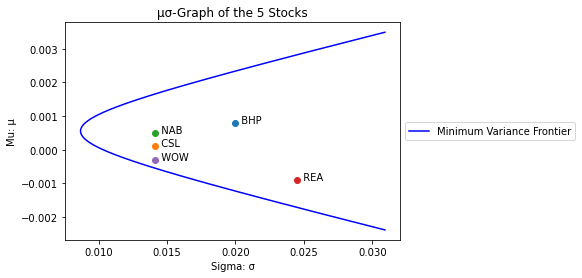

In [1659]:
# The five stocks

for i in range(5):
    plt.plot(round(np.sqrt(cov_mat[i][i]), 4), ret_array[i], "o")
    plt.text(round(np.sqrt(cov_mat[i][i]), 4), ret_array[i],'  {}'.format(stock_names[i]))
    
plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of the 5 Stocks")
plt.show()

Part c ii)
Minimum Variance Frontier

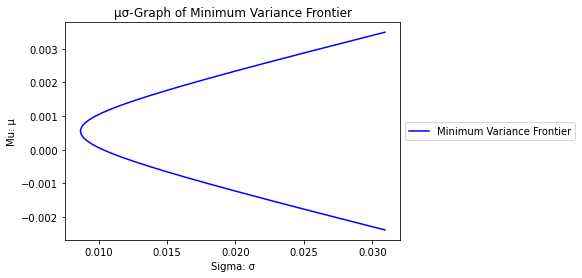

In [1660]:
# Minimum Variance Frontier (This is repeated from the use previously)

t_plot = np.linspace(-0.3, 0.3, 300) # sigma less than or equal to 0.03 constraint

var_x = np.sqrt(1/a + (d*t_plot**2)/a)
mu_y = b/a + (d*t_plot)/a

plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of Minimum Variance Frontier")
plt.show()

Part c iii)
Minimum Risk Portfolio

Minimum sigma: 0.0087
Minimum mu: 0.0005565217391304348


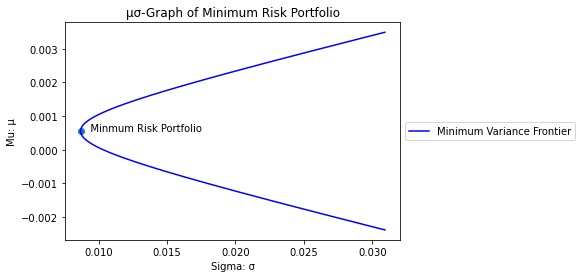

In [1661]:
# Minimum sigma: 

min_sd = 1/np.sqrt(a)

# Minimum mu:

min_mu = b/a

# Minimum Risk Portfolio:
print("Minimum sigma: " + str(round(min_sd, 4)))
print("Minimum mu: " + str(min_mu))

plt.plot(min_sd, min_mu, "o")
plt.text(min_sd, min_mu,'   Minmum Risk Portfolio')
plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of Minimum Risk Portfolio")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Part c iv)
1000 Random Portfolios

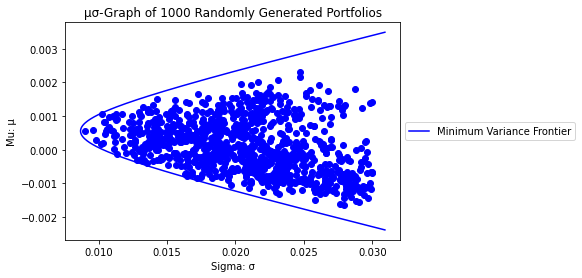

In [1662]:
# 1000 Random portfolios

i = 0 

while i < 1000: 

    result = np.random.uniform(-1,1, size = 4) # Getting 4 uniformly distribution points from -1 to 1
    final_prop = 1 - sum(result) # Getting the final proportion to ensure that the proportions sum to 1
    
    if final_prop > 1 or final_prop < -1: # ensuring screening of proportions that exceed -1 or 1
        continue
     
    final_result = np.append(result, final_prop)

    sigma_rand = np.sqrt(np.matmul(np.matmul(final_result.T, cov_mat), final_result)) # Calculating sigma of random port.
    mu_rand = np.matmul(final_result.T, ret_array) # Calculating mu of random portfolio

    if sigma_rand <= 0.03: # Ensuring it meets the sigma condition
        plt.plot(sigma_rand, mu_rand, "ob") # Plotting the point of the random portfolio

    i += 1

# Graphing the MVF
plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of 1000 Randomly Generated Portfolios")
plt.show()

Part c v)
Indifference Curve, Unrestricted Portfolio, Restricted Portfolio

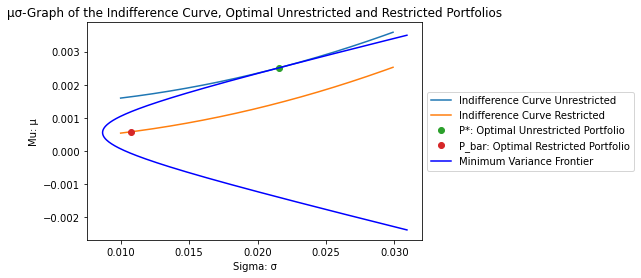

In [1663]:
# Indifference Curve

t = 0.2

sig_array = (np.arange(100, 300))/10000

def indiff_curve(sigma, z):
    return -1*(1/t)*z + (sigma**2)/(2*t)

def z_num(mu, sigma):
    return -1*t*mu + 0.5*sigma**2

plt.plot(sig_array, indiff_curve(sig_array, z_num(mu, sig)), label = "Indifference Curve Unrestricted")
plt.plot(sig_array, indiff_curve(sig_array, z_num(mu_res, sigma_res)), label = "Indifference Curve Restricted")

# Optimal Portfolios:

plt.plot(sig, mu, "o", label = "P*: Optimal Unrestricted Portfolio")
plt.plot(sigma_res, mu_res, "o", label = "P_bar: Optimal Restricted Portfolio")

legend_list = ["Indifference Curve", 
               "Optimal Unrestricted Portfolio", 
               "Optimal Restricted Portfolio",
               "Minimum Variance Frontier",
               "Restricted Minimum Variance Frontier"]

plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")
#plt.plot(var_x_res, mu_y_res) # Restricted Minimum Variance Frontier
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of the Indifference Curve, Optimal Unrestricted and Restricted Portfolios")
plt.show()


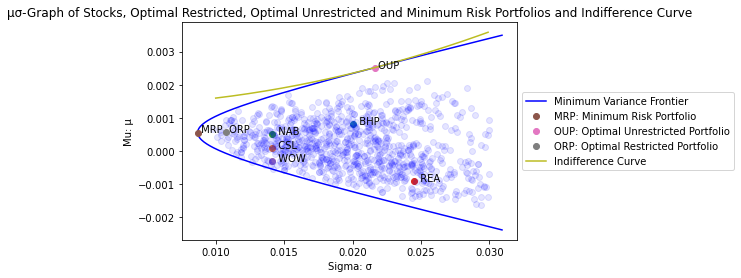

In [1664]:
### Master plot of all of the elements: 


# Ci :

for i in range(5):
    plt.plot(round(np.sqrt(cov_mat[i][i]), 4), ret_array[i], "o")
    plt.text(round(np.sqrt(cov_mat[i][i]), 4), ret_array[i],'  {}'.format(stock_names[i]))

# c ii:

plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier")


# C iii:

plt.plot(min_sd, min_mu, "o", label = "MRP: Minimum Risk Portfolio")
plt.text(min_sd, min_mu, " MRP")


# C iv:

i = 0 

while i < 1000: 

    result = np.random.uniform(-1,1, size = 4) # Getting 4 uniformly distribution points from -1 to 1
    final_prop = 1 - sum(result) # Getting the final proportion to ensure that the proportions sum to 1
    
    if final_prop > 1 or final_prop < -1: # ensuring screening of proportions that exceed -1 or 1
        continue
     
    final_result = np.append(result, final_prop)

    sigma_rand = np.sqrt(np.matmul(np.matmul(final_result.T, cov_mat), final_result)) # Calculating sigma of random port.
    mu_rand = np.matmul(final_result.T, ret_array) # Calculating mu of random portfolio

    if sigma_rand <= 0.03: # Ensuring it meets the sigma condition
        plt.plot(sigma_rand, mu_rand, "ob", alpha = 0.1) # Plotting the point of the random portfolio

    i += 1
    
    
# C v:

plt.plot(sig, mu, "o", label = "OUP: Optimal Unrestricted Portfolio")
plt.text(sig, mu, " OUP")

plt.plot(sigma_res, mu_res, "o", label = "ORP: Optimal Restricted Portfolio")
plt.text(sigma_res, mu_res, " ORP")

plt.plot(sig_array, indiff_curve(sig_array, z_num(mu, sig)), label = "Indifference Curve")

# Master plot

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of Stocks, Optimal Restricted, Optimal Unrestricted and Minimum Risk Portfolios and Indifference Curve")
plt.show()


### Question 3

#### Question 3 a
Obtain the new optimal (unrestricted) portfolio  ̂P allocation of Anthony to the (now) six
assets. Is it a lending portfolio or a borrowing portfolio?

In [1666]:
# Calculating Excess Return Rate

r_0 = 0.0001
ERR = ret_array - r_0*e[0]

# Calculating the new proportions 

risk_free_prop = 1 - t*np.matmul(np.matmul(e.T,S_inv), ERR)
risk_bear_prop = t*np.matmul(S_inv,ERR)

x_hat = np.append(risk_free_prop, risk_bear_prop)


# Calcualting the new mu and sigma for the new optimal portfolio

c_bar = np.matmul(np.matmul(ERR.T, S_inv), ERR)

mu_update = r_0 + c_bar*t
sigma_update = np.sqrt(c_bar*t**2)


# Printing the results 

print("Risk free asset proportion: " + str(risk_free_prop))

for index, x in enumerate(risk_bear_prop):
    print('{} new optimal proportion allocation:'.format(stock_names[index]), x)

print()
print("New Optimal Mu: " + str(mu_update))
print("New Optimal Sigma: " + str(sigma_update))


Risk free asset proportion: -0.2115384615384619
BHP new optimal proportion allocation: 0.35000000000000003
CSL new optimal proportion allocation: 1.7538461538461545
NAB new optimal proportion allocation: 1.6923076923076927
REA new optimal proportion allocation: -0.9230769230769234
WOW new optimal proportion allocation: -1.6615384615384619

New Optimal Mu: 0.0026096153846153847
New Optimal Sigma: 0.02240363981417031


Given the fact that the risk free asset proportion allocation is negative, it is a borrowing portfolio.

#### Question 3 b
Give the efficient frontier (Capital Market Line) of the six assets and the tangency portfolio.

Tangent Portfolio Mu: 0.0021714285714285715
Tangent Portfolio Sigma: 0.018491893179950092


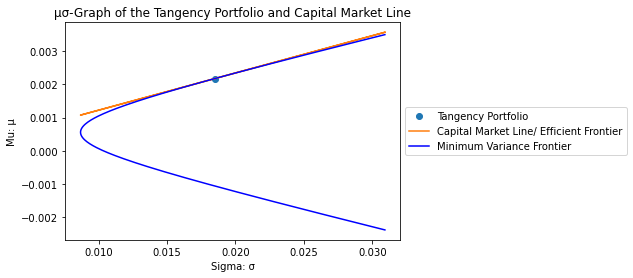

In [1667]:
# CML Line Calculation

def CML_Mu(r_0, c_bar, sigma_hat): 
    return r_0 + np.sqrt(c_bar)*sigma_hat

# Tangency Portfolio

sig_0 = np.sqrt((a/d)*(r_0 - (b/a))**2+1/a)

mu_M = (c-b*r_0)/(b-a*r_0)
sig_M = (sig_0*np.sqrt(d))/(b-a*r_0)
t_M = 1/(b-a*r_0)

print("Tangent Portfolio Mu: " + str(mu_M))
print("Tangent Portfolio Sigma: " + str(sig_M))

# Plotting the CML and Tangency Portfolio

plt.plot(sig_M, mu_M, "o", label = "Tangency Portfolio")
plt.plot(var_x, CML_Mu(r_0, c_bar, var_x), label = "Capital Market Line/ Efficient Frontier")
plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier") 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of the Tangency Portfolio and Capital Market Line")
plt.show()


#### Question 3 c
Make a new μσ-plane graph showing the riskless cash fund P0, the tangency portfolio,
Anthony’s new optimal portfolio ̂P and the Capital Market Line, in comparison to the
risky efficient frontier and the risky portfolio P∗.

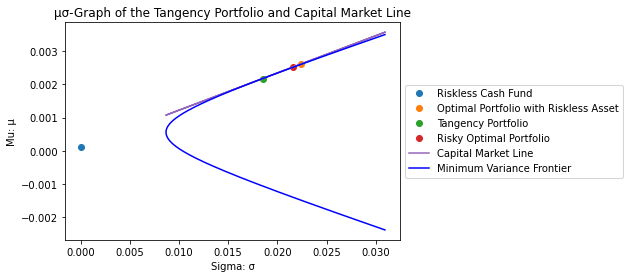

In [1668]:
# Riskless Portfolio

plt.plot(0, r_0, "o", label = "Riskless Cash Fund")

# New Optimal Portfolio

plt.plot(sigma_update, mu_update, "o", label = "Optimal Portfolio with Riskless Asset")

# Tangency Portfolio

plt.plot(sig_M, mu_M, "o", label = "Tangency Portfolio")

# Risky Portfolio

plt.plot(sig, mu, "o", label = "Risky Optimal Portfolio")

# CML

plt.plot(var_x, CML_Mu(r_0, c_bar, var_x), label = "Capital Market Line")

# Risky Efficient Frontier 

plt.plot(var_x, mu_y, "b", label = "Minimum Variance Frontier") 


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Sigma: \u03C3')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03C3-Graph of the Tangency Portfolio and Capital Market Line")
plt.show()

### Question 4

#### Question 4 a
Compute the β’s of all relevant assets in this project (5 stocks, P0, P∗, P, ̂P, PM ).

In [1669]:

name_array = np.append(stock_names, ["P_0", "P*", "P_bar", "P_hat", "P_M", "P_6"])

mu_array = [bhp_ret_mean,
              csl_ret_mean,
              nab_ret_mean,
              rea_ret_mean,
              wow_ret_mean,
              r_0,
              mu,
              mu_res,
              mu_update,
              mu_M]

t_M_res = 1/(b_res-a_res*r_0)

calculated_beta_list = []

def beta(mu, t_M):
    beta = (t_M*(mu - r_0)/sig_M**2)
    calculated_beta_list.append(beta)
    return beta

for index, mu in enumerate(mu_array):
    if index == 7:
        print("{} Beta: ".format(name_array[index]) + str(beta(mu, t_M_res)))
    else:
        print("{} Beta: ".format(name_array[index]) + str(beta(mu, t_M))) 


BHP Beta: 0.3379310344827586
CSL Beta: 0.0
NAB Beta: 0.1931034482758621
REA Beta: -0.48275862068965525
WOW Beta: -0.19310344827586207
P_0 Beta: 0.0
P* Beta: 1.1649175412293853
P_bar Beta: 0.3743236074270558
P_hat Beta: 1.2115384615384617
P_M Beta: 1.0000000000000002


#### Question 4 b
Suppose that there is a fund P6 available in the market. It is estimated to have an expected
return r6 = 0.0005 and a covariance with the market portfolio Cov(R6,RM ) = 0.0003.
According to CAPM, what should the expected return of the asset be? Compare this with
the given estimated expected return.

In [1670]:
r_6 = 0.0005
cov = 0.0003
beta_6 = cov/sig_M**2

exp_return = (r_0 + beta_6 * (mu_M - r_0))

print(exp_return)

0.0019173076923076928


The expected return produced by thr CAPM model (0.0019) is significantly larger than the actual expected return (0.0005).

#### Question 4 c
Produce a plot in μβ-plane showing the Security Market Line and the β’s of all relevant
assets in this project (5 stocks, P6, P0, P∗, P, ̂P, PM ).

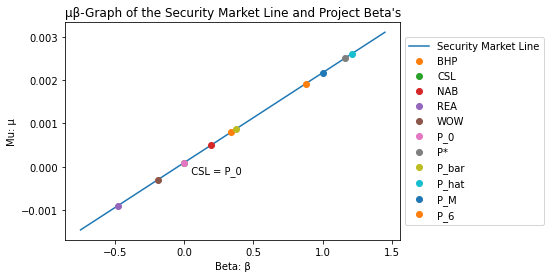

In [1671]:
# Security Market Line - plot for individual betas

beta_list = np.arange(-0.75, 1.5, 0.1)

def Mu_SML(Beta):
    return r_0 + Beta*(mu_M - r_0)

# SML Line: 

plt.plot(beta_list, Mu_SML(beta_list), label = "Security Market Line")

full_calculated_beta_list = np.append(calculated_beta_list, beta_6)

for index, beta in enumerate(full_calculated_beta_list):
    plt.plot(beta, Mu_SML(beta), "o", label = "{}".format(name_array[index]))
    if name_array[index] == "CSL":
        plt.text(beta + 0.0025, Mu_SML(beta) - 0.00025, '  {} = P_0'.format(name_array[index]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Beta: \u03B2')
plt.ylabel("Mu: \u03BC")
plt.title("\u03BC\u03B2-Graph of the Security Market Line and Project Beta's")
plt.show()